In [433]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [434]:
import io

with io.open('Arrhythmia_MLR/attributes.names', mode='r', encoding='utf-8') as f:
    lines = f.readlines()
lines = [line.strip() for line in lines]
attributes=[]
for attr in lines:
    indexs=[int(s) for s in attr.split() if s.isdigit()]
    if(len(indexs)==1):
        words=attr.split(" ")
        attributes.append(words[1])
    elif(len(indexs)==2):
       words=attr.split(" ")
       for i in range(1+indexs[1]-indexs[0]):
           attributes.append(words[3]+"_"+str(i))
     
categorical_data=["Sex","Existence_of_diphasic_derivation_of_P_wave","Existence_of_diphasic_derivation_of_R_wave",
                  "Existence_of_diphasic_derivation_of_T_wave","Existence_of_ragged_P_wave",
                  "Existence_of_ragged_R_wave","Existence_of_ragged_T_wave"]

data_info_root="Arrhythmia_MLR/data_info/"

In [435]:

data = pd.read_csv('Arrhythmia_MLR/arrhythmia.data', header=None, delimiter=',', names=attributes)

In [436]:
data.head()

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6_2_1,V6_2_2,V6_2_3,V6_2_4,V6_2_5,V6_2_6,V6_2_7,V6_2_8,V6_2_9,sicknes
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


SPRAWDZAMY CZY SĄ GDZIE PUSTE LUKI W DANYCH

In [437]:
data_null_sum=data.isnull().sum()
data_null_sum.to_csv(data_info_root+"data_null_sum.csv")
data_null_sum=data_null_sum.sum()
data_null_sum
#jak widac nigdzie nie brakuje danych w postaci pustej komórki

0

In [438]:
missing_values=[]
missing_values_status=[]
for attr in data.columns:
    misval=np.where(data[attr]=='?')
    missing_values_status.append([attr,misval[0]])
    if(len(misval[0])!=0):
        missing_values.append([attr,misval[0]])
pd.DataFrame(missing_values_status).to_csv(data_info_root+"data_missing_val.csv",header=False)
missing_values # puste wartosci przedstawione przy postaci znaku '?'


[['T', array([ 66,  91, 200, 212, 238, 360, 372, 412])],
 ['P',
  array([ 54,  59, 106, 108, 116, 133, 174, 177, 193, 204, 217, 219, 243,
         253, 279, 284, 298, 300, 308, 310, 350, 420])],
 ['QRST', array([241])],
 ['J',
  array([  0,   1,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,  14,
          15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
          55,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,
          69,  70,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,
          83,  84,  87,  90,  91,  92,  94,  95,  96,  97,  98, 100, 101,
         102, 103, 104, 105, 106, 107, 109, 110, 111, 113, 114, 115, 116,
         117, 118, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
         131, 132, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145,
         146, 147, 148, 149, 150,

Sprawdzenie w jakim procencie danych brakuje wartosci

In [439]:
for misval in missing_values:
    print(misval[0],"długość",len(misval[1]),"procent wartosci:",len(misval[1])/len(data))

T długość 8 procent wartosci: 0.017699115044247787
P długość 22 procent wartosci: 0.048672566371681415
QRST długość 1 procent wartosci: 0.0022123893805309734
J długość 376 procent wartosci: 0.831858407079646
Heart_rate długość 1 procent wartosci: 0.0022123893805309734


Usuniesie kolumny J i sprawdzenie drugi raz brakujacych wartosci

In [440]:
#usuwamy wartosc J gdyz brakuje w niej ponad 83 procent danych
data=data.drop(columns='J',axis=1)



In [441]:


missing_values=[]
missing_values_status=[]
for attr in data.columns:
    misval=np.where(data[attr]=='?')
    missing_values_status.append([attr,misval[0]])
    if(len(misval[0])!=0):
        missing_values.append([attr,misval[0]])
pd.DataFrame(missing_values_status).to_csv(data_info_root+"data_missing_val.csv",header=False)
missing_values # puste wartosci przedstawione przy postaci znaku '?'

[['T', array([ 66,  91, 200, 212, 238, 360, 372, 412])],
 ['P',
  array([ 54,  59, 106, 108, 116, 133, 174, 177, 193, 204, 217, 219, 243,
         253, 279, 284, 298, 300, 308, 310, 350, 420])],
 ['QRST', array([241])],
 ['Heart_rate', array([4])]]

Sprawdzamy jakie klasy chorob dla jakiej cechy są powinny być obliczane

In [442]:
sicknes_data=[]
sicknes_types=[]
for misval in missing_values:
    for col in misval[1]:
        sicknes_data.append([misval[0],data["sicknes"][col],col])
        sicknes_types.append(data["sicknes"][col])
set(sicknes_types)

{1, 2, 3, 4, 6, 7, 10, 15, 16}

Wypisujemy te cechy i ich klasy chorob dla których dane wpisujemy z srednich oraz te które wpisujemy recznie

In [443]:
mean_data=[]
manual_data=[]
for dt in sicknes_data:
    if(dt[1]!=3 and dt[1]!=4 and dt[1]!=7 and dt[1]!=15):
        mean_data.append(dt)
    else:
        manual_data.append(dt)

In [444]:
print(manual_data)

[['T', 4, 91], ['P', 15, 174], ['P', 3, 204], ['P', 15, 217], ['P', 15, 243], ['P', 3, 253], ['P', 15, 300], ['P', 15, 420], ['Heart_rate', 7, 4]]


In [445]:
mean_data

[['T', 2, 66],
 ['T', 2, 200],
 ['T', 2, 212],
 ['T', 1, 238],
 ['T', 2, 360],
 ['T', 2, 372],
 ['T', 16, 412],
 ['P', 16, 54],
 ['P', 1, 59],
 ['P', 6, 106],
 ['P', 2, 108],
 ['P', 16, 116],
 ['P', 1, 133],
 ['P', 1, 177],
 ['P', 2, 193],
 ['P', 16, 219],
 ['P', 1, 279],
 ['P', 10, 284],
 ['P', 10, 298],
 ['P', 2, 308],
 ['P', 1, 310],
 ['P', 1, 350],
 ['QRST', 1, 241]]

In [446]:

def get_mean(data,label,sicknes):
    idxs=data.loc[data["sicknes"]==sicknes].index
    arr_mean=[]
    for i in idxs:
        if data[label][i]!='?':
            arr_mean.append(data[label][i])
    return np.mean(np.array(arr_mean).astype(float))


In [447]:
for mdata in mean_data:
    data[mdata[0]][mdata[2]]=get_mean(data,mdata[0],mdata[1])

/tmp/ipykernel_27638/3856677013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[mdata[0]][mdata[2]]=get_mean(data,mdata[0],mdata[1])


In [448]:
def get_arr_mean(data,label,sicknes):
    idxs=data.loc[data["sicknes"]==sicknes].index
    arr_mean=[]
    for i in idxs:
        if data[label][i]!='?':
            arr_mean.append(data[label][i])
    return arr_mean


In [449]:
for mdata in manual_data:
    print(mdata[0],mdata[1],get_arr_mean(data,mdata[0],mdata[1]))

T 4 ['46', '60', '87', '15', '-8', '38', '104', '-75', '114', '-49', '137', '66', '-42', '51']
P 15 []
P 3 ['68', '37', '43', '71', '68', '36', '50', '59', '39', '14', '72', '30', '26']
P 15 []
P 15 []
P 3 ['68', '37', '43', '71', '68', '36', '50', '59', '39', '14', '72', '30', '26']
P 15 []
P 15 []
Heart_rate 7 ['86', '63']


Dla klasy choroby 7 czyli Ventricular Premature Contraction (PVC) heart_rate waha sie od 60-100 wiec umieszczam wartosc (86+63)/2 zostanie wpisana 

48.8613344205605


/tmp/ipykernel_27638/4154352118.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["T"][91]=get_mean(data,manual_data[0][0],manual_data[0][1])
/tmp/ipykernel_27638/4154352118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["P"][204]=get_mean(data,manual_data[2][0],manual_data[2][1])
/tmp/ipykernel_27638/4154352118.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["P"][253]=get_mean(data,manual_data[2][0],manual_da

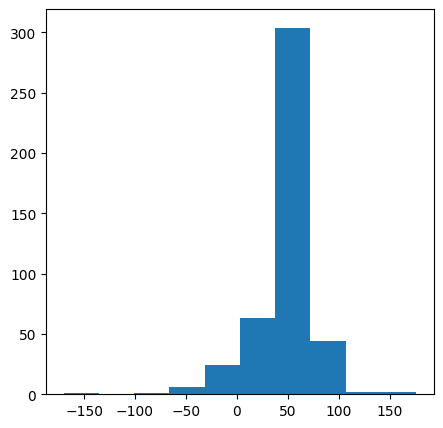

In [450]:
data["T"][91]=get_mean(data,manual_data[0][0],manual_data[0][1])
data["P"][204]=get_mean(data,manual_data[2][0],manual_data[2][1])
data["P"][253]=get_mean(data,manual_data[2][0],manual_data[2][1])
data["Heart_rate"][4]=(86+63)/2
data
P_data=data["P"].copy()
P_data=P_data.drop([174,217,243,300,420])

P_avg=np.mean(P_data.astype(float))
print(P_avg)
fig,axs=plt.subplots(1,1,figsize=[5,5])
axs.hist(P_data.astype(float))
for i in [174,217,243,300,420]:
    data["P"][i]=P_avg


Sprawdzenie z zmodyfikowanie formatu danych

In [451]:
print(data.dtypes)
pd.DataFrame(data.dtypes).to_csv(data_info_root+"data_types.csv")

Age               int64
Sex               int64
Height            int64
Weight            int64
QRS_duration      int64
                 ...   
V6_2_6          float64
V6_2_7          float64
V6_2_8          float64
V6_2_9          float64
sicknes           int64
Length: 279, dtype: object


In [452]:
for column in data.columns:
    if(data[column].dtype==object):
        data[column]=data[column].astype(float)
print(data.dtypes)


pd.DataFrame(data.dtypes).to_csv(data_info_root+"data_types_changed.csv")

Age               int64
Sex               int64
Height            int64
Weight            int64
QRS_duration      int64
                 ...   
V6_2_6          float64
V6_2_7          float64
V6_2_8          float64
V6_2_9          float64
sicknes           int64
Length: 279, dtype: object


ANALIZA DANYCH

In [453]:
def create_histograms(n_vertical,n_horizontal,fig_size,dataset,titles,xlabel,ylabel,n_bins,labels):
    fig,axs=fig,axs=plt.subplots(n_vertical,n_horizontal,figsize=fig_size)
    i=0
    if n_vertical==1 and n_horizontal==1:
        axs.hist(dataset,n_bins,label=labels)
        axs.set_title(titles)
        axs.set_xlabel(xlabel)
        axs.set_ylabel(ylabel)  
        
    else:
        for axr in axs:
            if n_horizontal==1 or n_vertical==1:
                axr.hist(dataset[i],n_bins[i],label=labels)
                axr.set_title(titles[i])
                axr.set_xlabel(xlabel[i])
                axr.set_ylabel(ylabel[i])
                i+=1
            else:
                for ax in axr:
                    if(i !=len(dataset)):
                        ax.hist(dataset[i],n_bins[i])
                        ax.set_title(titles[i])
                        ax.set_xlabel(xlabel[i])
                        ax.set_ylabel(ylabel[i])
                        i+=1

In [454]:

data["sicknes"].value_counts()

1     245
10     50
2      44
6      25
16     22
3      15
4      15
5      13
9       9
15      5
14      4
7       3
8       2
Name: sicknes, dtype: int64

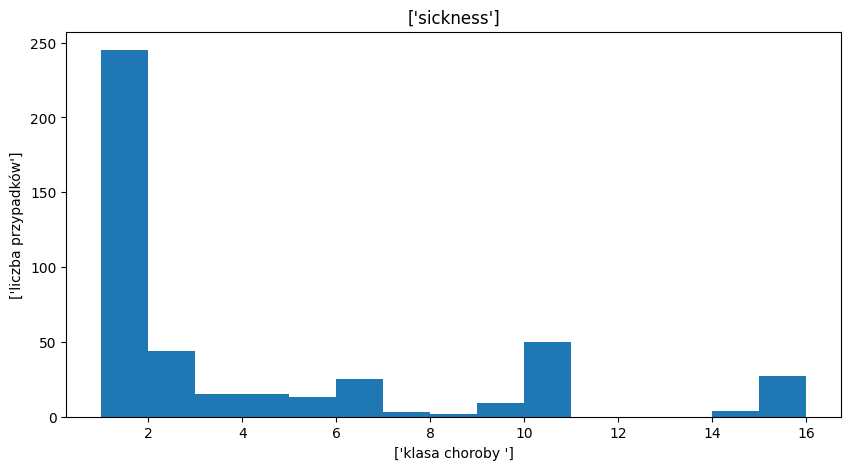

In [455]:

create_histograms(1,1,fig_size=[10,5],dataset=[data["sicknes"]],titles=["sickness"],xlabel=["klasa choroby "],ylabel=["liczba przypadków"],n_bins=15,labels=2)

Dataset


In [456]:


data_normal=data.loc[data["sicknes"]==1]
data_sick=data.loc[data["sicknes"]==10]


WIEK

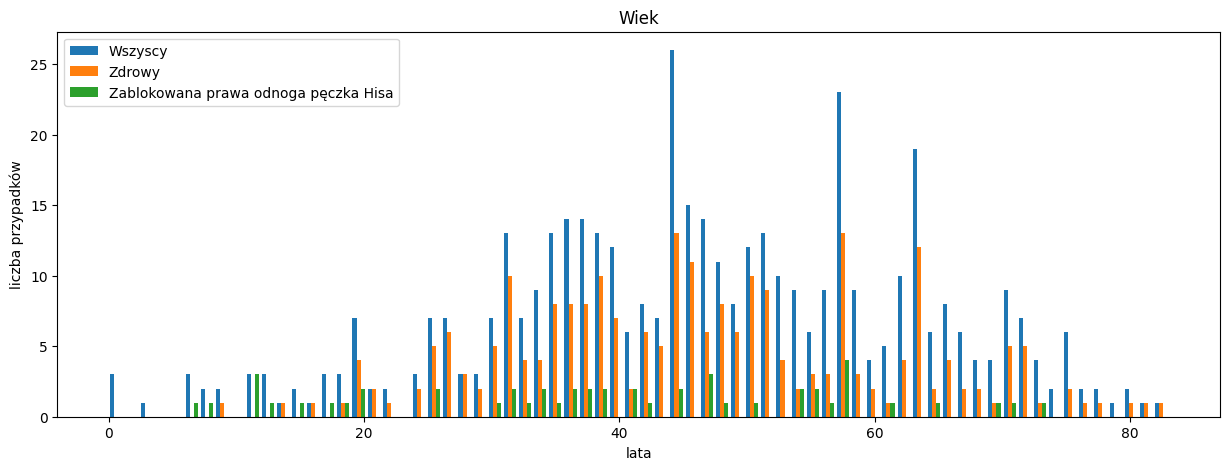

In [457]:
label="Age"
title="Wiek"
xlabel="lata"
labels=["Wszyscy","Zdrowy","Zablokowana prawa odnoga pęczka Hisa"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label],data_normal[label],data_sick[label]],bins=70,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')    


In [458]:

print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )

print("Dla zdrowych")
print(  "maksymalna wartosc",np.max(data_normal[label]),
"minimalna",np.min(data_normal[label]),
"srednia" ,np.mean(data_normal[label]),
"odchylenie",np.std(data_normal[label], ddof=1) )

print("Dla chorych")
print(  "maksymalna wartosc",np.max(data_sick[label]),
"minimalna",np.min(data_sick[label]),
"srednia" ,np.mean(data_sick[label]),
"odchylenie",np.std(data_sick[label], ddof=1) )

Dla Całości
maksymalna wartosc 83 minimalna 0 srednia 46.4712389380531 odchylenie 16.466631319744405
Dla zdrowych
maksymalna wartosc 83 minimalna 9 srednia 46.2734693877551 odchylenie 14.556092402453762
Dla chorych
maksymalna wartosc 73 minimalna 7 srednia 38.92 odchylenie 17.692198211387424


PŁEĆ

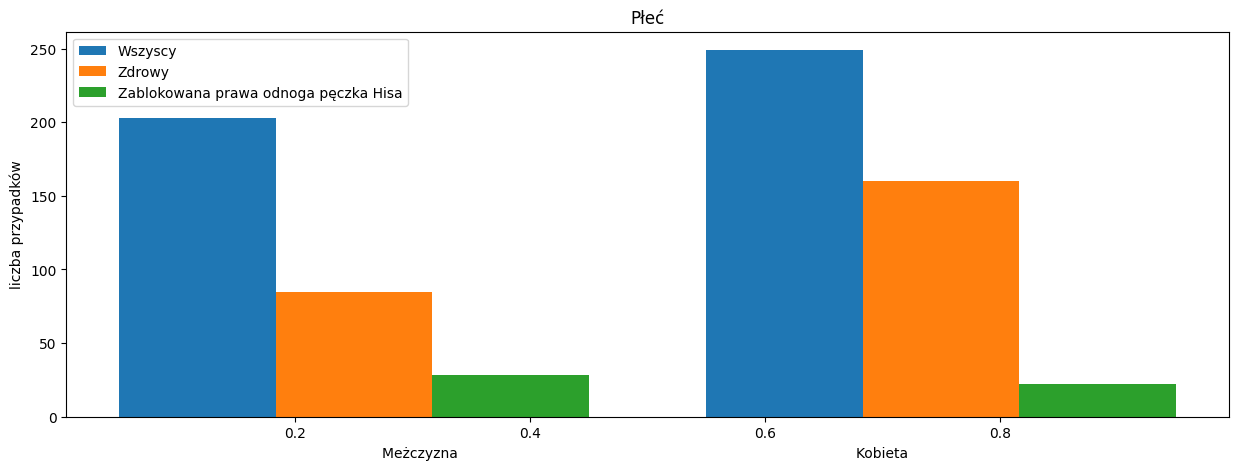

In [459]:
label="Sex"
title="Płeć"
xlabel="Meżczyzna                                                                                           Kobieta "
labels=["Wszyscy","Zdrowy","Zablokowana prawa odnoga pęczka Hisa"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label],data_normal[label],data_sick[label]],bins=2,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   

In [460]:

print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )

print("Dla zdrowych")
print(  "maksymalna wartosc",np.max(data_normal[label]),
"minimalna",np.min(data_normal[label]),
"srednia" ,np.mean(data_normal[label]),
"odchylenie",np.std(data_normal[label], ddof=1) )

print("Dla chorych")
print(  "maksymalna wartosc",np.max(data_sick[label]),
"minimalna",np.min(data_sick[label]),
"srednia" ,np.mean(data_sick[label]),
"odchylenie",np.std(data_sick[label], ddof=1) )

Dla Całości
maksymalna wartosc 1 minimalna 0 srednia 0.5508849557522124 odchylenie 0.49795512228377115
Dla zdrowych
maksymalna wartosc 1 minimalna 0 srednia 0.6530612244897959 odchylenie 0.47697047749324467
Dla chorych
maksymalna wartosc 1 minimalna 0 srednia 0.44 odchylenie 0.501426536422407


Wzrost

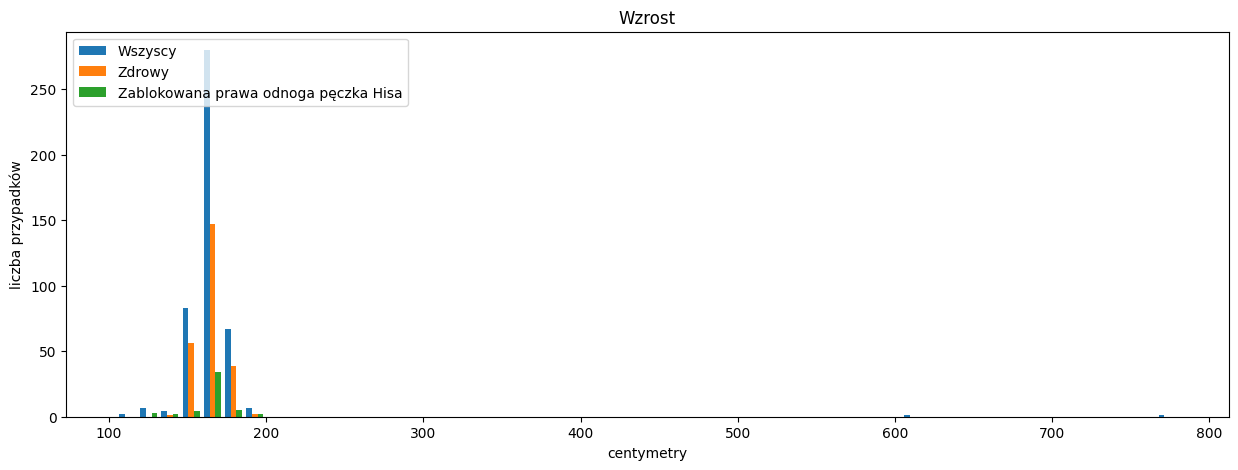

In [461]:
label="Height"
title="Wzrost"
xlabel="centymetry"

labels=["Wszyscy","Zdrowy","Zablokowana prawa odnoga pęczka Hisa"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label],data_normal[label],data_sick[label]],bins=50,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   

In [462]:

print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )

print("Dla zdrowych")
print(  "maksymalna wartosc",np.max(data_normal[label]),
"minimalna",np.min(data_normal[label]),
"srednia" ,np.mean(data_normal[label]),
"odchylenie",np.std(data_normal[label], ddof=1) )

print("Dla chorych")
print(  "maksymalna wartosc",np.max(data_sick[label]),
"minimalna",np.min(data_sick[label]),
"srednia" ,np.mean(data_sick[label]),
"odchylenie",np.std(data_sick[label], ddof=1) )

Dla Całości
maksymalna wartosc 780 minimalna 105 srednia 166.18805309734512 odchylenie 37.17034006678041
Dla zdrowych
maksymalna wartosc 186 minimalna 132 srednia 164.10204081632654 odchylenie 8.048125985816393
Dla chorych
maksymalna wartosc 190 minimalna 120 srednia 163.52 odchylenie 13.699754206047729


In [463]:
data.loc[data["Height"]>200]

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6_2_1,V6_2_2,V6_2_3,V6_2_4,V6_2_5,V6_2_6,V6_2_7,V6_2_8,V6_2_9,sicknes
141,1,1,780,6,85,165,237,150,106,88,...,0.0,5.0,-4.6,0.0,0.0,1.3,0.7,2.7,5.5,5
316,0,0,608,10,83,126,232,128,60,125,...,-0.7,4.5,-5.5,0.0,0.0,0.5,2.5,-11.8,1.7,5


In [464]:
data.loc[data["Weight"]<30]

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6_2_1,V6_2_2,V6_2_3,V6_2_4,V6_2_5,V6_2_6,V6_2_7,V6_2_8,V6_2_9,sicknes
60,1,0,110,10,80,121,287,156,67,126,...,-0.5,5.1,-4.8,0.0,0.0,0.8,0.9,-1.8,5.2,5
126,58,0,186,18,87,166,372,150,96,-1,...,-0.8,6.3,-2.9,0.0,0.0,0.7,1.4,5.7,15.7,1
141,1,1,780,6,85,165,237,150,106,88,...,0.0,5.0,-4.6,0.0,0.0,1.3,0.7,2.7,5.5,5
210,11,1,124,25,90,161,349,209,98,80,...,0.0,8.6,-4.6,0.0,0.0,0.6,4.2,3.5,42.1,10
316,0,0,608,10,83,126,232,128,60,125,...,-0.7,4.5,-5.5,0.0,0.0,0.5,2.5,-11.8,1.7,5
320,3,0,105,12,69,155,240,133,64,93,...,0.0,3.3,0.0,0.0,0.0,1.1,-0.1,5.9,5.4,5
379,8,0,120,28,118,126,303,164,80,120,...,-0.6,12.5,-3.6,0.0,0.0,0.5,2.3,9.2,32.2,10
401,9,0,120,25,95,118,347,156,66,84,...,-1.9,16.5,-1.4,0.0,0.0,0.4,3.0,25.3,49.9,14
403,7,1,127,22,185,204,284,123,72,-172,...,0.0,3.9,-15.0,0.0,0.0,-0.8,3.6,-36.6,-20.1,5
424,7,0,119,21,140,157,438,226,81,-40,...,0.0,10.0,-2.1,0.0,0.0,1.0,5.5,36.7,115.9,9


In [465]:
data=data.drop(126)
data["Height"][141]=90
data["Height"][316]=100

/tmp/ipykernel_27638/819637169.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Height"][141]=90
/tmp/ipykernel_27638/819637169.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Height"][316]=100


In [466]:
data.loc[data["Weight"]<30]

,Age,Sex,Height,Weight,QRS_duration,P-R_interval,Q-T_interval,T_interval,P_interval,QRS,...,V6_2_1,V6_2_2,V6_2_3,V6_2_4,V6_2_5,V6_2_6,V6_2_7,V6_2_8,V6_2_9,sicknes
60,1,0,110,10,80,121,287,156,67,126,...,-0.5,5.1,-4.8,0.0,0.0,0.8,0.9,-1.8,5.2,5
141,1,1,90,6,85,165,237,150,106,88,...,0.0,5.0,-4.6,0.0,0.0,1.3,0.7,2.7,5.5,5
210,11,1,124,25,90,161,349,209,98,80,...,0.0,8.6,-4.6,0.0,0.0,0.6,4.2,3.5,42.1,10
316,0,0,100,10,83,126,232,128,60,125,...,-0.7,4.5,-5.5,0.0,0.0,0.5,2.5,-11.8,1.7,5
320,3,0,105,12,69,155,240,133,64,93,...,0.0,3.3,0.0,0.0,0.0,1.1,-0.1,5.9,5.4,5
379,8,0,120,28,118,126,303,164,80,120,...,-0.6,12.5,-3.6,0.0,0.0,0.5,2.3,9.2,32.2,10
401,9,0,120,25,95,118,347,156,66,84,...,-1.9,16.5,-1.4,0.0,0.0,0.4,3.0,25.3,49.9,14
403,7,1,127,22,185,204,284,123,72,-172,...,0.0,3.9,-15.0,0.0,0.0,-0.8,3.6,-36.6,-20.1,5
424,7,0,119,21,140,157,438,226,81,-40,...,0.0,10.0,-2.1,0.0,0.0,1.0,5.5,36.7,115.9,9
429,8,1,130,24,77,125,358,159,70,87,...,0.0,11.3,-2.1,0.0,0.0,0.7,3.6,16.1,49.2,16


Waga

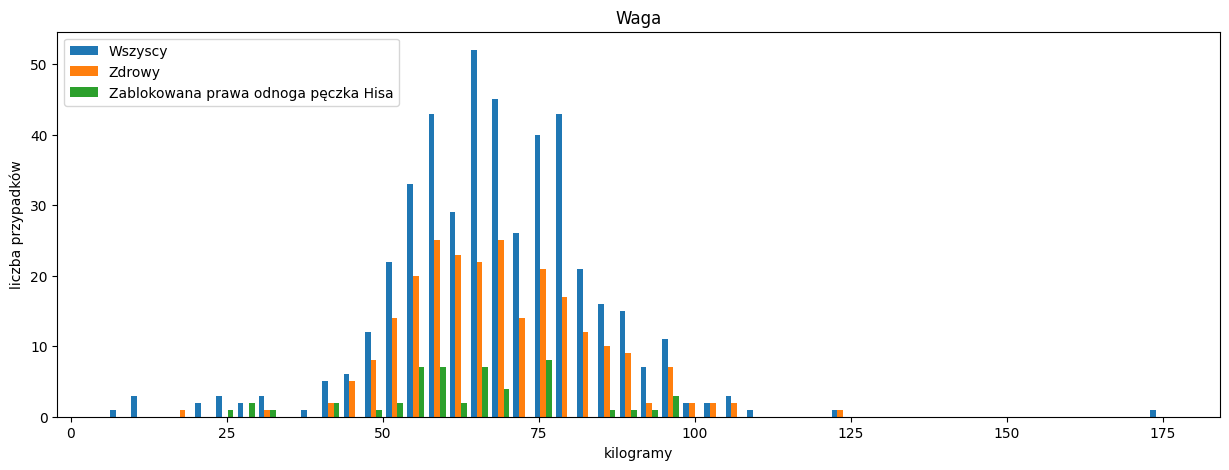

In [467]:
label="Weight"
title="Waga"
xlabel="kilogramy"

labels=["Wszyscy","Zdrowy","Zablokowana prawa odnoga pęczka Hisa"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label],data_normal[label],data_sick[label]],bins=50,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   

In [468]:

print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )

print("Dla zdrowych")
print(  "maksymalna wartosc",np.max(data_normal[label]),
"minimalna",np.min(data_normal[label]),
"srednia" ,np.mean(data_normal[label]),
"odchylenie",np.std(data_normal[label], ddof=1) )

print("Dla chorych")
print(  "maksymalna wartosc",np.max(data_sick[label]),
"minimalna",np.min(data_sick[label]),
"srednia" ,np.mean(data_sick[label]),
"odchylenie",np.std(data_sick[label], ddof=1) )

Dla Całości
maksymalna wartosc 176 minimalna 6 srednia 68.28159645232816 odchylenie 16.439602404664598
Dla zdrowych
maksymalna wartosc 124 minimalna 18 srednia 68.66938775510204 odchylenie 14.454595447180552
Dla chorych
maksymalna wartosc 95 minimalna 25 srednia 63.3 odchylenie 16.579123829044025


Czas trwania odcinka QRS

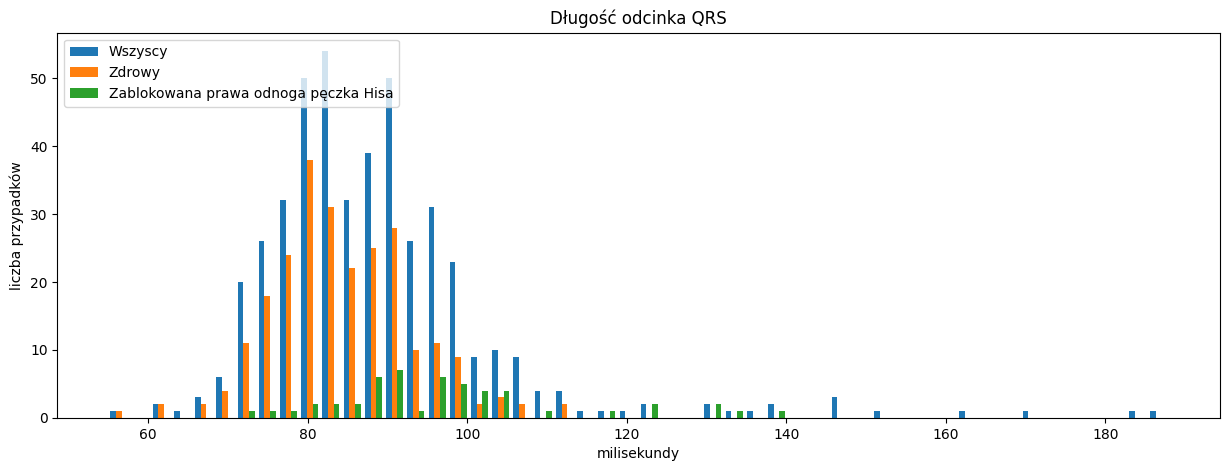

In [469]:
label="QRS_duration"
title="Długość odcinka QRS"
xlabel="milisekundy"

labels=["Wszyscy","Zdrowy","Zablokowana prawa odnoga pęczka Hisa"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label],data_normal[label],data_sick[label]],bins=50,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   

In [470]:

print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )

print("Dla zdrowych")
print(  "maksymalna wartosc",np.max(data_normal[label]),
"minimalna",np.min(data_normal[label]),
"srednia" ,np.mean(data_normal[label]),
"odchylenie",np.std(data_normal[label], ddof=1) )

print("Dla chorych")
print(  "maksymalna wartosc",np.max(data_sick[label]),
"minimalna",np.min(data_sick[label]),
"srednia" ,np.mean(data_sick[label]),
"odchylenie",np.std(data_sick[label], ddof=1) )

Dla Całości
maksymalna wartosc 188 minimalna 55 srednia 88.92461197339246 odchylenie 15.381188857901527
Dla zdrowych
maksymalna wartosc 113 minimalna 55 srednia 84.27755102040817 odchylenie 8.735439062649531
Dla chorych
maksymalna wartosc 138 minimalna 72 srednia 97.58 odchylenie 15.129495452693103


P-R interwał

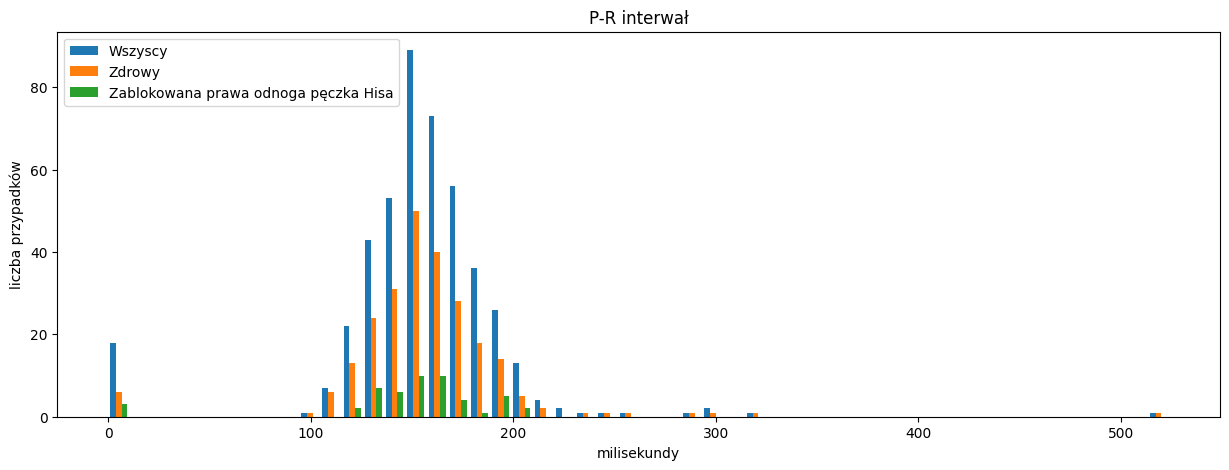

In [471]:
label="P-R_interval"
title="P-R interwał"
xlabel="milisekundy"

labels=["Wszyscy","Zdrowy","Zablokowana prawa odnoga pęczka Hisa"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label],data_normal[label],data_sick[label]],bins=50,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   

In [472]:
print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )

print("Dla zdrowych")
print(  "maksymalna wartosc",np.max(data_normal[label]),
"minimalna",np.min(data_normal[label]),
"srednia" ,np.mean(data_normal[label]),
"odchylenie",np.std(data_normal[label], ddof=1) )

print("Dla chorych")
print(  "maksymalna wartosc",np.max(data_sick[label]),
"minimalna",np.min(data_sick[label]),
"srednia" ,np.mean(data_sick[label]),
"odchylenie",np.std(data_sick[label], ddof=1) )

Dla Całości
maksymalna wartosc 524 minimalna 0 srednia 155.12860310421286 odchylenie 44.889160805500964
Dla zdrowych
maksymalna wartosc 524 minimalna 0 srednia 157.21632653061224 odchylenie 44.745158850412835
Dla chorych
maksymalna wartosc 204 minimalna 0 srednia 148.74 odchylenie 43.71793168735694


Q-T interwał

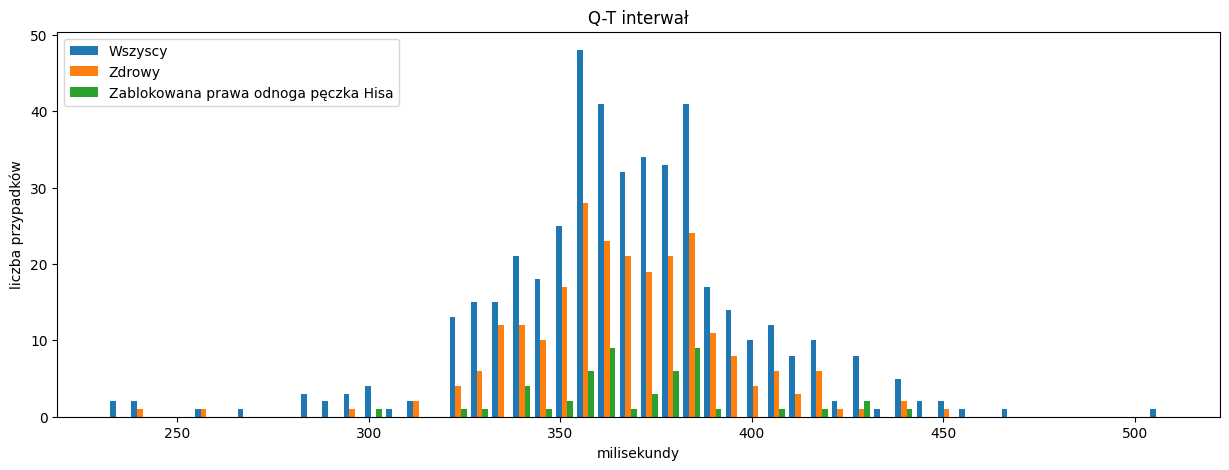

In [473]:
label="Q-T_interval"
title="Q-T interwał"
xlabel="milisekundy"

labels=["Wszyscy","Zdrowy","Zablokowana prawa odnoga pęczka Hisa"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label],data_normal[label],data_sick[label]],bins=50,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   

In [474]:
print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )

print("Dla zdrowych")
print(  "maksymalna wartosc",np.max(data_normal[label]),
"minimalna",np.min(data_normal[label]),
"srednia" ,np.mean(data_normal[label]),
"odchylenie",np.std(data_normal[label], ddof=1) )

print("Dla chorych")
print(  "maksymalna wartosc",np.max(data_sick[label]),
"minimalna",np.min(data_sick[label]),
"srednia" ,np.mean(data_sick[label]),
"odchylenie",np.std(data_sick[label], ddof=1) )

Dla Całości
maksymalna wartosc 509 minimalna 232 srednia 367.1973392461197 odchylenie 33.42173068220055
Dla zdrowych
maksymalna wartosc 450 minimalna 241 srednia 367.2 odchylenie 26.458845246973247
Dla chorych
maksymalna wartosc 440 minimalna 303 srednia 369.76 odchylenie 26.007502842096024


T interwał

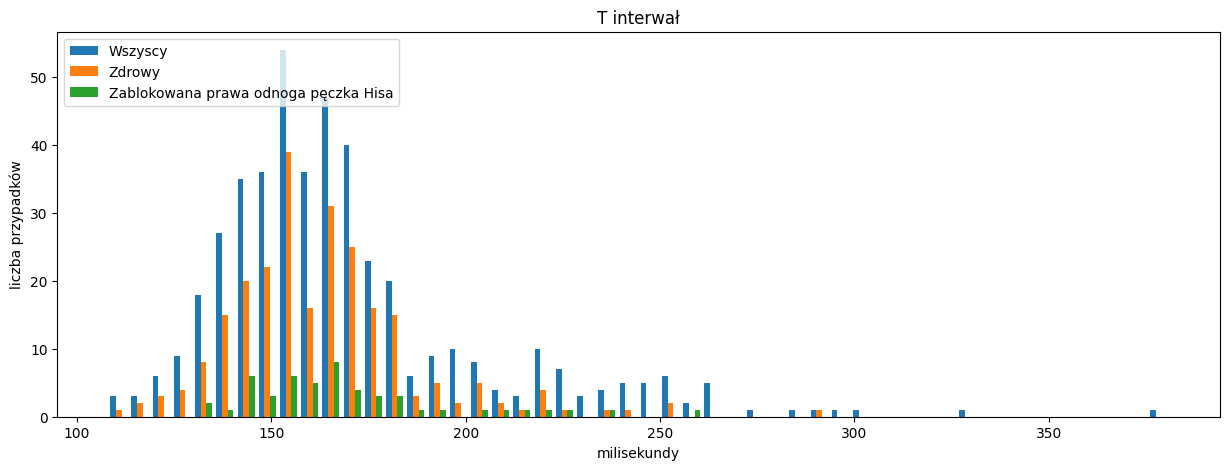

In [475]:
label="T_interval"
title="T interwał"
xlabel="milisekundy"

labels=["Wszyscy","Zdrowy","Zablokowana prawa odnoga pęczka Hisa"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label],data_normal[label],data_sick[label]],bins=50,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   

In [476]:
print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )

print("Dla zdrowych")
print(  "maksymalna wartosc",np.max(data_normal[label]),
"minimalna",np.min(data_normal[label]),
"srednia" ,np.mean(data_normal[label]),
"odchylenie",np.std(data_normal[label], ddof=1) )

print("Dla chorych")
print(  "maksymalna wartosc",np.max(data_sick[label]),
"minimalna",np.min(data_sick[label]),
"srednia" ,np.mean(data_sick[label]),
"odchylenie",np.std(data_sick[label], ddof=1) )

Dla Całości
maksymalna wartosc 381 minimalna 108 srednia 169.99334811529934 odchylenie 35.66021686368737
Dla zdrowych
maksymalna wartosc 292 minimalna 111 srednia 162.91836734693877 odchylenie 24.3265327172787
Dla chorych
maksymalna wartosc 260 minimalna 132 srednia 169.32 odchylenie 26.86583445985793


P interwał

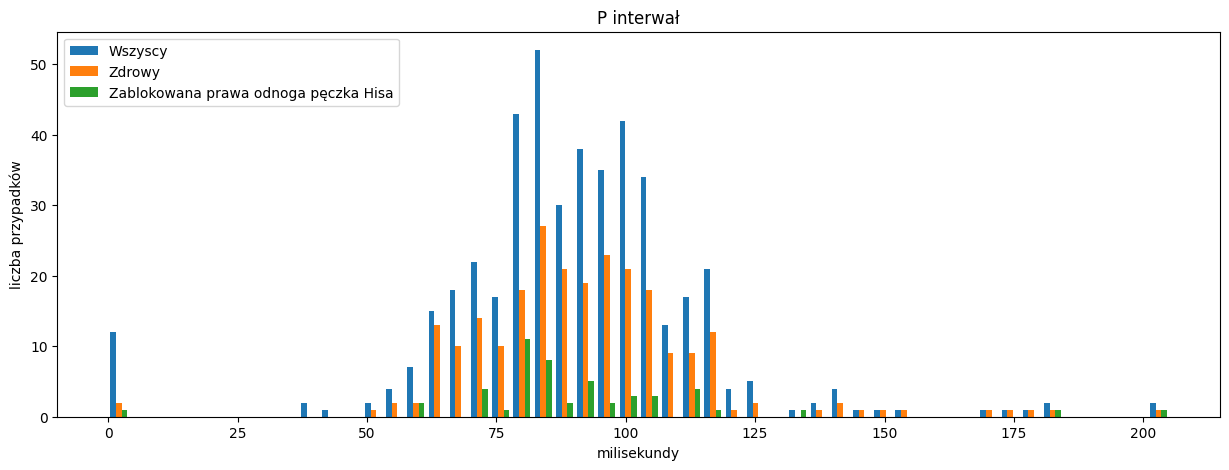

In [477]:
label="P_interval"
title="P interwał"
xlabel="milisekundy"

labels=["Wszyscy","Zdrowy","Zablokowana prawa odnoga pęczka Hisa"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label],data_normal[label],data_sick[label]],bins=50,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   

In [478]:
print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )

print("Dla zdrowych")
print(  "maksymalna wartosc",np.max(data_normal[label]),
"minimalna",np.min(data_normal[label]),
"srednia" ,np.mean(data_normal[label]),
"odchylenie",np.std(data_normal[label], ddof=1) )

print("Dla chorych")
print(  "maksymalna wartosc",np.max(data_sick[label]),
"minimalna",np.min(data_sick[label]),
"srednia" ,np.mean(data_sick[label]),
"odchylenie",np.std(data_sick[label], ddof=1) )

Dla Całości
maksymalna wartosc 205 minimalna 0 srednia 89.9911308203991 odchylenie 25.853775332446627
Dla zdrowych
maksymalna wartosc 205 minimalna 0 srednia 92.2326530612245 odchylenie 23.39554206305599
Dla chorych
maksymalna wartosc 204 minimalna 0 srednia 91.18 odchylenie 28.508280214988883


Wektor QRS

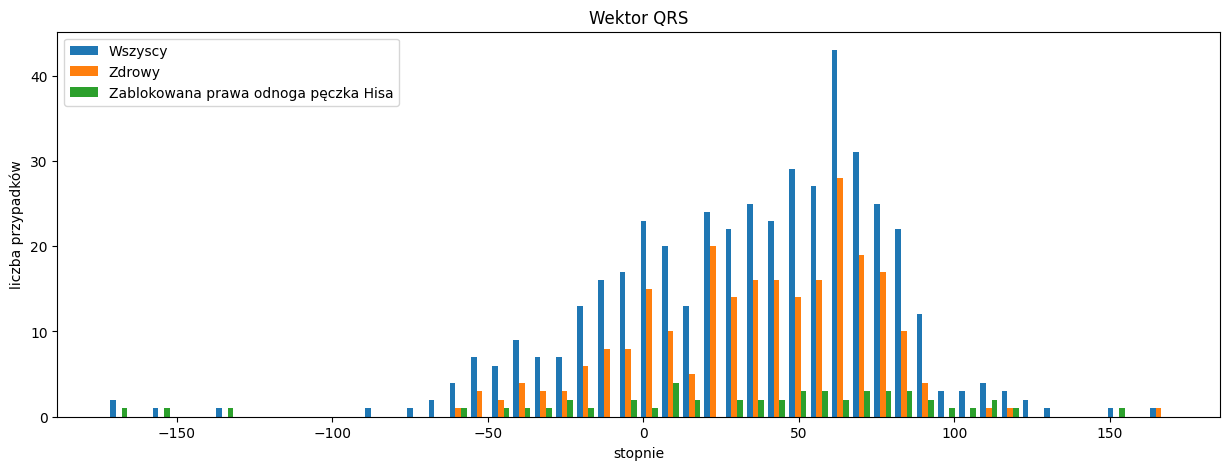

In [479]:
label="QRS"
title="Wektor QRS"
xlabel="stopnie"

labels=["Wszyscy","Zdrowy","Zablokowana prawa odnoga pęczka Hisa"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label],data_normal[label],data_sick[label]],bins=50,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   

In [480]:
print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )

print("Dla zdrowych")
print(  "maksymalna wartosc",np.max(data_normal[label]),
"minimalna",np.min(data_normal[label]),
"srednia" ,np.mean(data_normal[label]),
"odchylenie",np.std(data_normal[label], ddof=1) )

print("Dla chorych")
print(  "maksymalna wartosc",np.max(data_sick[label]),
"minimalna",np.min(data_sick[label]),
"srednia" ,np.mean(data_sick[label]),
"odchylenie",np.std(data_sick[label], ddof=1) )

Dla Całości
maksymalna wartosc 169 minimalna -172 srednia 33.753880266075384 odchylenie 45.452433762231884
Dla zdrowych
maksymalna wartosc 169 minimalna -58 srednia 36.78775510204082 odchylenie 36.108724892779065
Dla chorych
maksymalna wartosc 155 minimalna -166 srednia 31.98 odchylenie 66.63561896077587


Wektor T

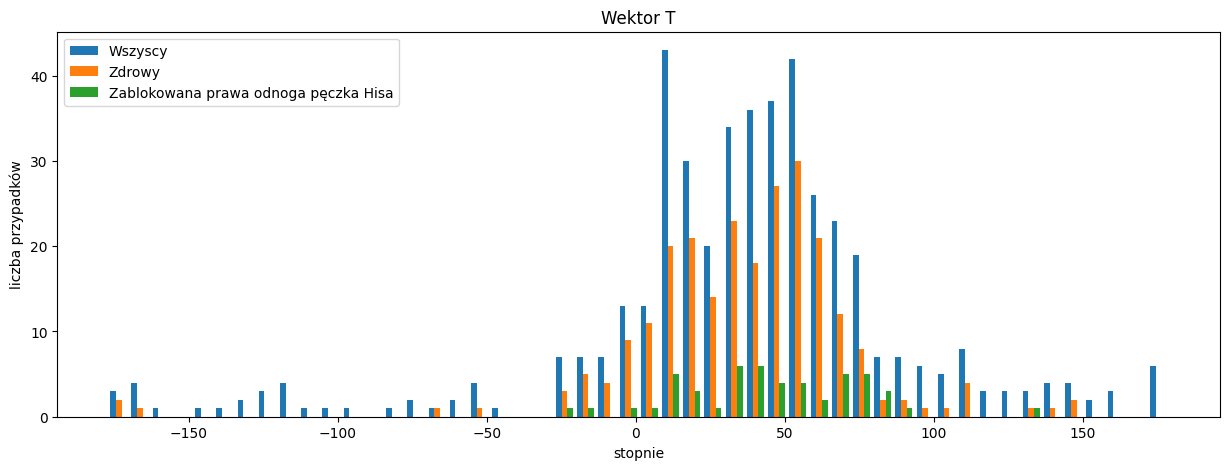

In [481]:
label="T"
title="Wektor T"
xlabel="stopnie"

labels=["Wszyscy","Zdrowy","Zablokowana prawa odnoga pęczka Hisa"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label],data_normal[label],data_sick[label]],bins=50,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   

In [482]:
print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )

print("Dla zdrowych")
print(  "maksymalna wartosc",np.max(data_normal[label]),
"minimalna",np.min(data_normal[label]),
"srednia" ,np.mean(data_normal[label]),
"odchylenie",np.std(data_normal[label], ddof=1) )

print("Dla chorych")
print(  "maksymalna wartosc",np.max(data_sick[label]),
"minimalna",np.min(data_sick[label]),
"srednia" ,np.mean(data_sick[label]),
"odchylenie",np.std(data_sick[label], ddof=1) )

Dla Całości
maksymalna wartosc 179.0 minimalna -177.0 srednia 35.86820499905266 odchylenie 57.436543356977
Dla zdrowych
maksymalna wartosc 150.0 minimalna -177.0 srednia 36.41393442622951 odchylenie 38.77272959091385
Dla chorych
maksymalna wartosc 136.0 minimalna -21.0 srednia 45.34 odchylenie 29.723631771946806


Wektor P

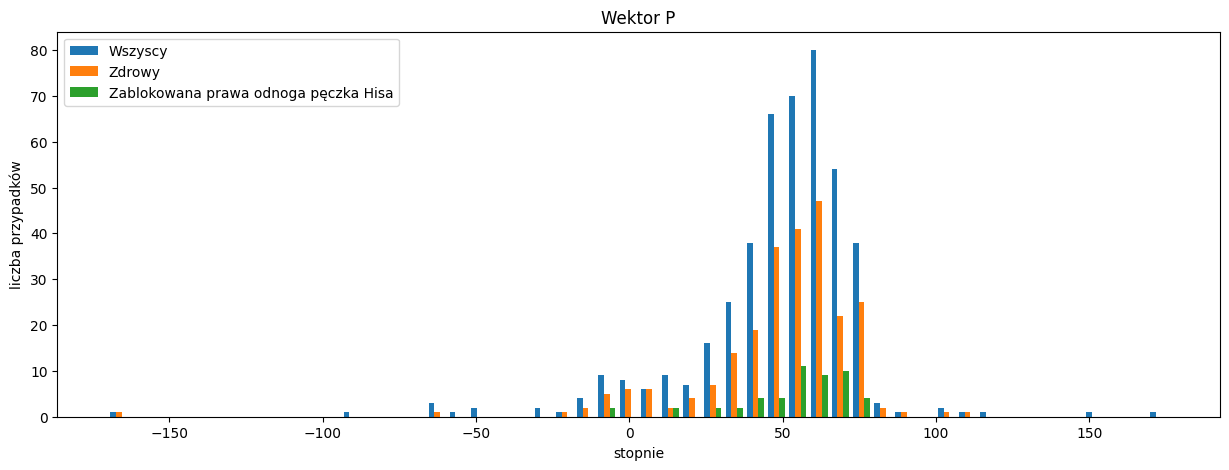

In [483]:
label="P"
title="Wektor P"
xlabel="stopnie"

labels=["Wszyscy","Zdrowy","Zablokowana prawa odnoga pęczka Hisa"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label],data_normal[label],data_sick[label]],bins=50,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   

In [484]:
print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )

print("Dla zdrowych")
print(  "maksymalna wartosc",np.max(data_normal[label]),
"minimalna",np.min(data_normal[label]),
"srednia" ,np.mean(data_normal[label]),
"odchylenie",np.std(data_normal[label], ddof=1) )

print("Dla chorych")
print(  "maksymalna wartosc",np.max(data_sick[label]),
"minimalna",np.min(data_sick[label]),
"srednia" ,np.mean(data_sick[label]),
"odchylenie",np.std(data_sick[label], ddof=1) )

Dla Całości
maksymalna wartosc 176.0 minimalna -170.0 srednia 48.88319990708058 odchylenie 28.65631257413903
Dla zdrowych
maksymalna wartosc 107.0 minimalna -170.0 srednia 49.30125523012552 odchylenie 26.71788785146703
Dla chorych
maksymalna wartosc 78.0 minimalna -9.0 srednia 52.83333333333333 odchylenie 19.61500189446149


Wektor QRST

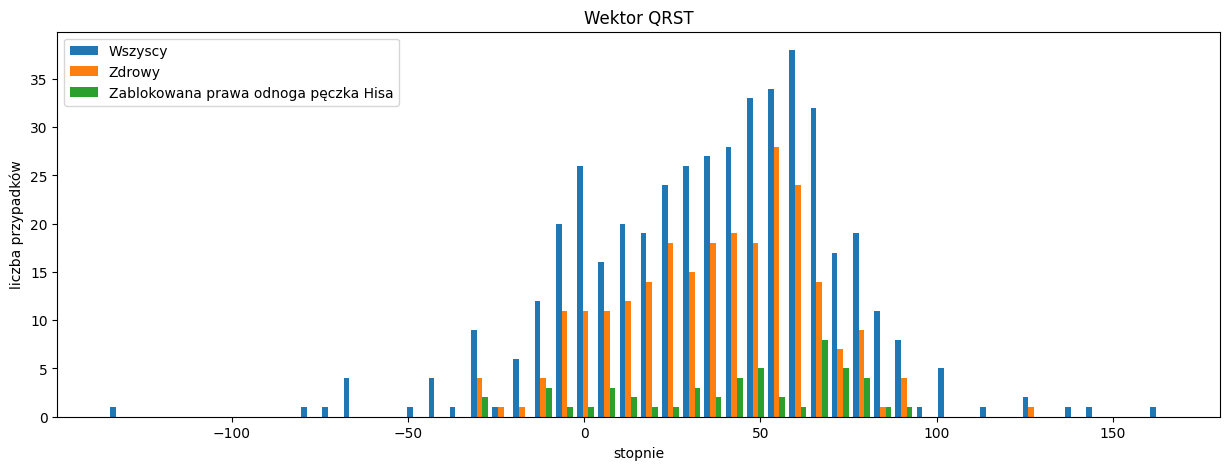

In [485]:
label="QRST"
title="Wektor QRST"
xlabel="stopnie"

labels=["Wszyscy","Zdrowy","Zablokowana prawa odnoga pęczka Hisa"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label],data_normal[label],data_sick[label]],bins=50,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   

In [486]:
print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )

print("Dla zdrowych")
print(  "maksymalna wartosc",np.max(data_normal[label]),
"minimalna",np.min(data_normal[label]),
"srednia" ,np.mean(data_normal[label]),
"odchylenie",np.std(data_normal[label], ddof=1) )

print("Dla chorych")
print(  "maksymalna wartosc",np.max(data_sick[label]),
"minimalna",np.min(data_sick[label]),
"srednia" ,np.mean(data_sick[label]),
"odchylenie",np.std(data_sick[label], ddof=1) )

Dla Całości
maksymalna wartosc 166.0 minimalna -135.0 srednia 36.761795281887245 odchylenie 36.008725304211424
Dla zdrowych
maksymalna wartosc 124.0 minimalna -32.0 srednia 37.56967213114754 odchylenie 26.876601406636045
Dla chorych
maksymalna wartosc 92.0 minimalna -29.0 srednia 42.78 odchylenie 31.659083230889802


Tętno

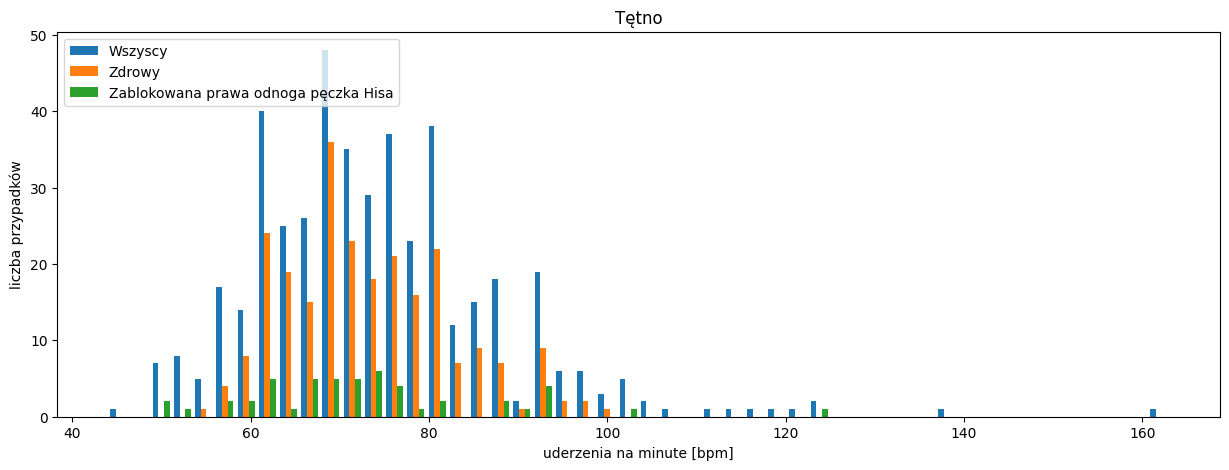

In [487]:
label="Heart_rate"
title="Tętno"
xlabel="uderzenia na minute [bpm]"

labels=["Wszyscy","Zdrowy","Zablokowana prawa odnoga pęczka Hisa"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label],data_normal[label],data_sick[label]],bins=50,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   

In [488]:
print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )

print("Dla zdrowych")
print(  "maksymalna wartosc",np.max(data_normal[label]),
"minimalna",np.min(data_normal[label]),
"srednia" ,np.mean(data_normal[label]),
"odchylenie",np.std(data_normal[label], ddof=1) )

print("Dla chorych")
print(  "maksymalna wartosc",np.max(data_sick[label]),
"minimalna",np.min(data_sick[label]),
"srednia" ,np.mean(data_sick[label]),
"odchylenie",np.std(data_sick[label], ddof=1) )

Dla Całości
maksymalna wartosc 163.0 minimalna 44.0 srednia 74.47339246119734 odchylenie 13.86908478191168
Dla zdrowych
maksymalna wartosc 101.0 minimalna 55.0 srednia 73.2 odchylenie 9.159604830763044
Dla chorych
maksymalna wartosc 123.0 minimalna 50.0 srednia 72.82 odchylenie 13.655663398646835


Szerokość Q fali

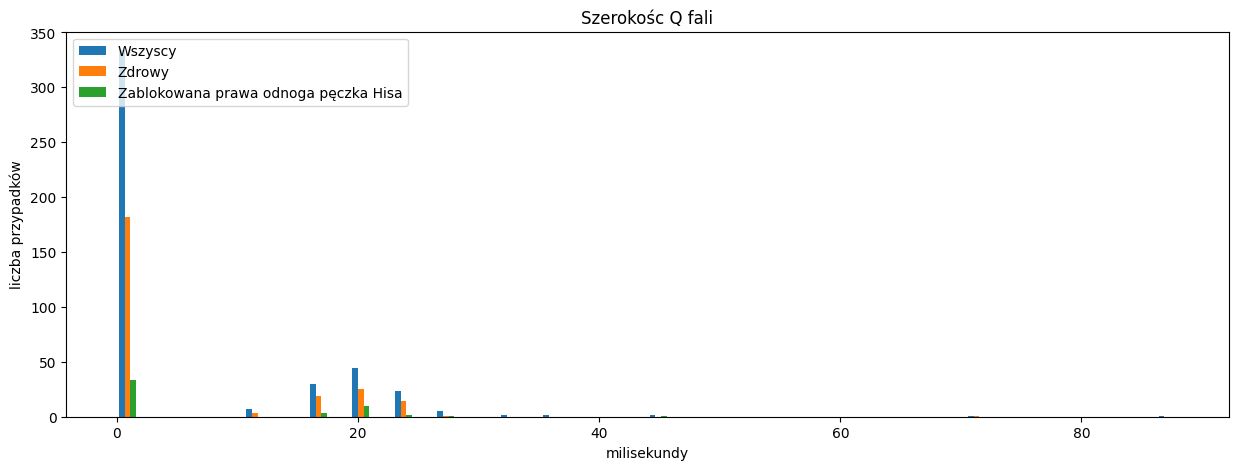

In [489]:
label="Q_wave"
title="Szerokośc Q fali"
xlabel="milisekundy"

labels=["Wszyscy","Zdrowy","Zablokowana prawa odnoga pęczka Hisa"]

fig,axs=plt.subplots(1,1,figsize=[15,5])
axs.hist([data[label],data_normal[label],data_sick[label]],bins=50,label=labels)
axs.set_title(title)
axs.set_xlabel(xlabel)
axs.set_ylabel("liczba przypadków")  
axs.legend(loc='upper right')
axs.legend(loc='upper left')   

In [490]:
print("Dla Całości")
print(  "maksymalna wartosc",np.max(data[label]),
"minimalna",np.min(data[label]),
"srednia" ,np.mean(data[label]),
"odchylenie",np.std(data[label], ddof=1) )

print("Dla zdrowych")
print(  "maksymalna wartosc",np.max(data_normal[label]),
"minimalna",np.min(data_normal[label]),
"srednia" ,np.mean(data_normal[label]),
"odchylenie",np.std(data_normal[label], ddof=1) )

print("Dla chorych")
print(  "maksymalna wartosc",np.max(data_sick[label]),
"minimalna",np.min(data_sick[label]),
"srednia" ,np.mean(data_sick[label]),
"odchylenie",np.std(data_sick[label], ddof=1) )

Dla Całości
maksymalna wartosc 88 minimalna 0 srednia 5.587583148558759 odchylenie 10.626517195271662
Dla zdrowych
maksymalna wartosc 72 minimalna 0 srednia 5.208163265306123 odchylenie 9.641607170264416
Dla chorych
maksymalna wartosc 44 minimalna 0 srednia 7.36 odchylenie 11.002337413996562



MODYFIKOWANIE DANYCH DO UCZENIA

In [491]:
pd.DataFrame(data).to_csv("better_data.csv")

Dane kategoryczne

Onehot Poprawny zapis

Normalizacja

Korelacja z klasa chorob

odrzucenie cech z Korelacja poniżej 0.1

cO ZROBIE W SIECI:
DATALOADER NA TE DANE Z BATCHAMI
PODZIELENIE DANYCH NA UCZACE TESTOWE I VALIDACYJNE 
DOPISANIE SZTUCZNIE DANYCH (MOZE)
ZBIORY TESTOWY I WALIDACYJNY TEN SAM PROCENT RODZAJOW DANYCH
DLA TESTOWEGO ZROBI SIE KOPIE ABY BYLO POROWNO LUB ZASTOSUJE SIE UCZENIE Z WAZENIEM
ZASTOSOWANIE FUNKCJI RELU I SOFTMAX I CROSSENTROPI I LINNIOWEGO MODELU SIECI